Spearman correlation (numeric vars):
                              mother_highest_grade  father_highest_grade  \
mother_highest_grade                          1.00                  0.56   
father_highest_grade                          0.56                  1.00   
regular_classroom                             0.10                  0.25   
CMAT_BasicCalc_Comp_Quotient                  0.23                  0.39   
KeyMath_Numeration_ScS                        0.19                  0.41   
KeyMath_Measurement_ScS                       0.22                  0.54   
KeyMath_ProblemSolving_ScS                    0.32                  0.57   
WJ-III_MathFluency_StS                        0.05                  0.15   
WASI_VIQ_t2                                   0.49                  0.42   

                              regular_classroom  CMAT_BasicCalc_Comp_Quotient  \
mother_highest_grade                       0.10                          0.23   
father_highest_grade                    

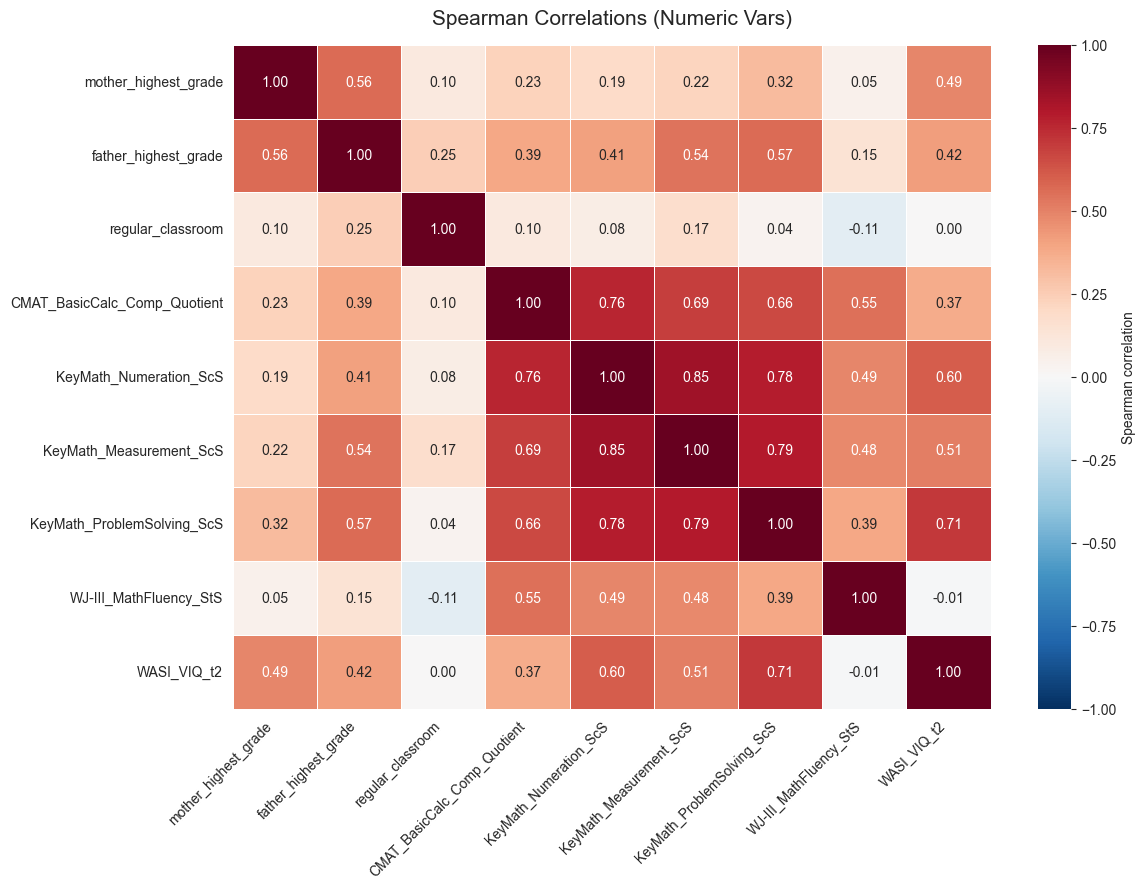


Spearman correlation (Parental education + VIQ):
                      mother_highest_grade  father_highest_grade  WASI_VIQ_t2
mother_highest_grade                  1.00                  0.56         0.49
father_highest_grade                  0.56                  1.00         0.42
WASI_VIQ_t2                           0.49                  0.42         1.00


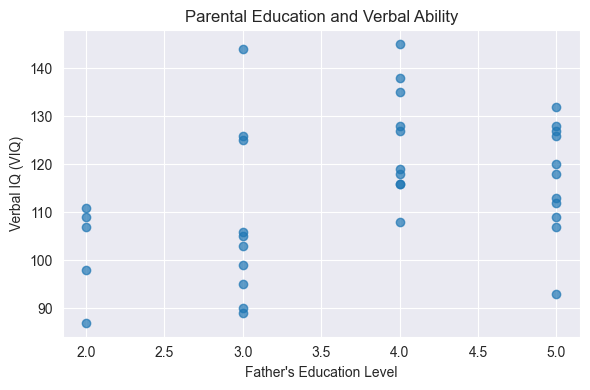

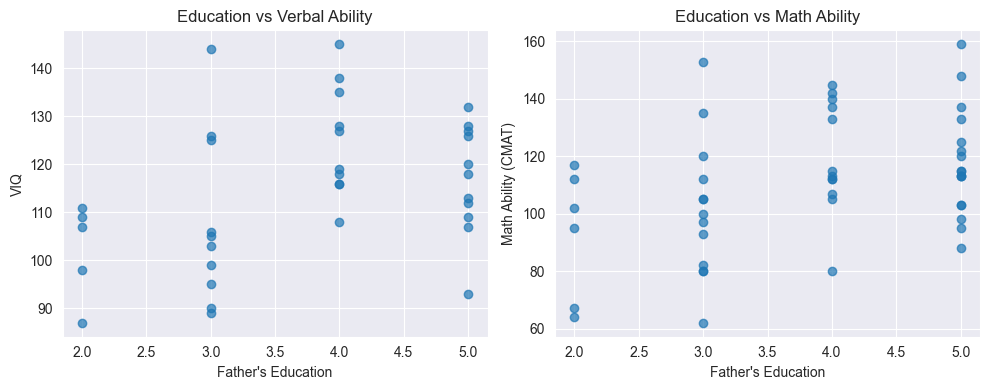

In [2]:
import importlib

import eda_background_math_verbal_py as eda
import graphs

# Reload if you edited files without restarting kernel
importlib.reload(eda)
importlib.reload(graphs)

# --------- CONFIG ----------
CSV_PATH = "main_dataset.csv"   # <-- change if needed
# ---------------------------

df = eda.load_data(CSV_PATH)
background_vars, math_vars = eda.get_variable_selection()
eda_df = eda.create_eda_subset(df, background_vars, math_vars)

# Correlation matrix (numeric vars)
corr = eda.preprocess_and_compute_correlations(eda_df)
print("Spearman correlation (numeric vars):")
print(corr.round(2))

graphs.plot_correlation_heatmap(corr, title="Spearman Correlations (Numeric Vars)")

# Verbal-only correlations
verbal_corr = eda.verbal_correlation(eda_df)
print("\nSpearman correlation (Parental education + VIQ):")
print(verbal_corr.round(2))

# Scatter plots
graphs.verbal_scatter_plot(eda_df)
graphs.father_education_math_vs_verbal_scatter(eda_df)
